In [5]:
import pandas as pd
import os

## Merging 12 Months of sales Data

In [10]:
df=pd.read_csv("./Sales_Data/Sales_April_2019.csv")


files=[file for file in os.listdir('./Sales_Data')]

all_months=pd.DataFrame()
for file in files:
    df=pd.read_csv('./Sales_Data/'+file)
    all_months_data=pd.concat([all_months,df])
all_months.to_csv("all_data.csv",index=False)

## Read in Updated Dataframe

In [13]:
all_data=pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"


## cleaning Data

In [18]:
nan_df=all_data[all_data.isna().any(axis=1)]
nan_df.head()

all_data=all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",09/
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",09/
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",09/
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",09/
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",09/


## Find 'or' and Delete

In [27]:
temp_df=all_data[all_data['Order Date'].str[0:2]!='Or']
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",09
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",09
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",09
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",09
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",09


## Add Month Column

In [29]:
# Remove rows where 'Order Date' starts with 'Or' before extracting month
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data['Month'] = all_data['Order Date'].str[0:2].astype('int32')
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",9
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9


## convert columns to the correct type

In [30]:
all_data['Quantity Ordered']=pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each']=pd.to_numeric(all_data['Price Each'])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",9
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9


In [ ]:
## add a sales column

all_data['Sales']=all_data['Quantity Ordered']*all_data['Price Each']
all_data.head()


In [61]:
## add a city column
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City']=all_data['Purchase Address'].apply(lambda x: get_city(x)+'('+get_state(x)+')')
#all_data=all_data.drop(columns='Column')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9,15.36,Los Angeles(CA)
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",9,23.90,Austin(TX)
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9,11.95,Los Angeles(CA)
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9,149.99,Seattle(WA)
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9,11.95,Atlanta(GA)


## best month for sales

In [46]:
results=all_data.groupby('Month').sum()

In [ ]:

import matplotlib.pyplot as plt
months=range(1,13)
plt.bar(months,results['Sales'])
plt.show()

## what city has a highest no of sale

In [ ]:
results=all_data.groupby('City').sum()


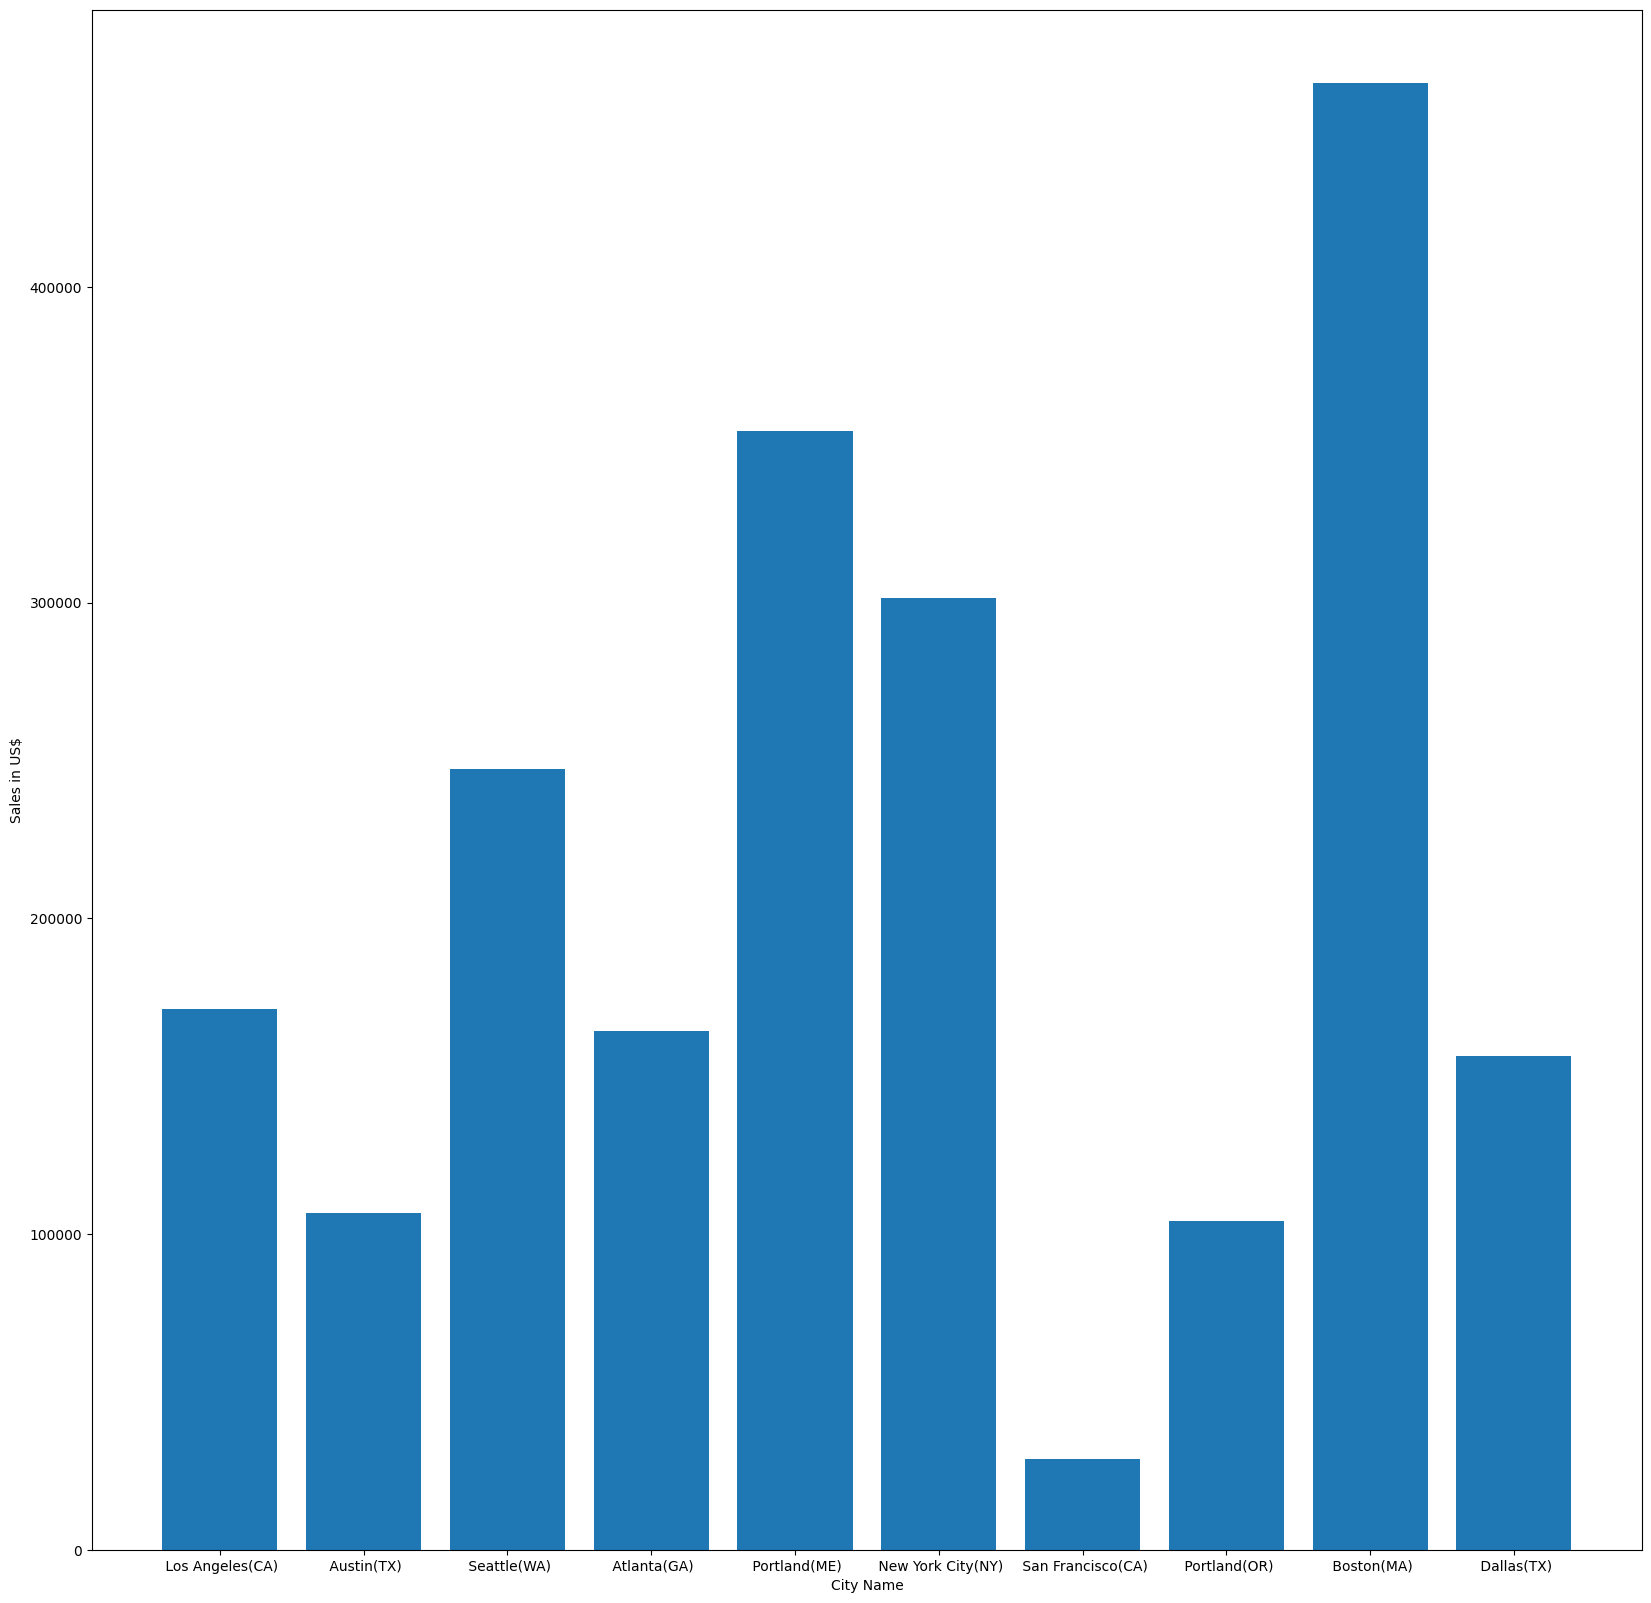

In [67]:
import matplotlib.pyplot as plt

cities=all_data['City'].unique()
plt.figure(figsize=(20,20))
plt.bar(cities,results['Sales'])

plt.xticks(cities)
plt.ylabel('Sales in US$')
plt.xlabel('City Name')
plt.show()

## What time should we display advertisement to minimize likelihood of customer's buying product ?

In [ ]:
all_data['Order Date']=pd.to_datetime(all_data['Order Date'])

all_data['Hour']=all_data['Order Date'].dt.hour
all_data['Minute']=all_data['Order Date'].dt.minute

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,15.36,Los Angeles(CA),14,44
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,23.90,Austin(TX),10,19
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,11.95,Los Angeles(CA),17,48
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,149.99,Seattle(WA),7,52
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,11.95,Atlanta(GA),19,3


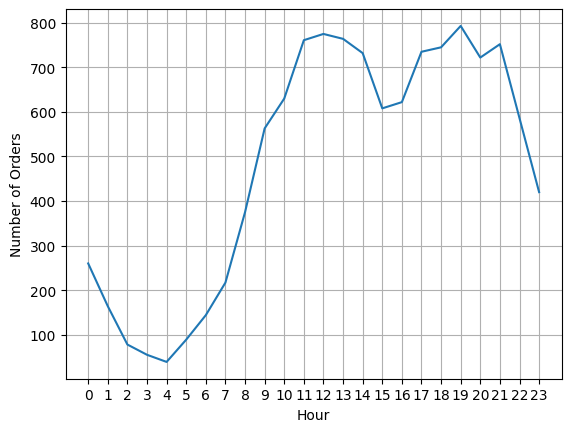

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Minute
Hour,,,,,,,,,,
0,260,260,260,260,260,260,260,260,260,260
1,164,164,164,164,164,164,164,164,164,164
2,78,78,78,78,78,78,78,78,78,78
3,55,55,55,55,55,55,55,55,55,55
4,39,39,39,39,39,39,39,39,39,39
5,89,89,89,89,89,89,89,89,89,89
6,144,144,144,144,144,144,144,144,144,144
7,217,217,217,217,217,217,217,217,217,217
8,375,375,375,375,375,375,375,375,375,375


In [78]:
hours = [hour for hour, df in all_data.groupby('Hour')]
plt.plot(hours, all_data.groupby('Hour').count()['Order ID'])
plt.xticks(hours)
plt.grid()
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.show()
all_data.groupby('Hour').count()

## What product are most often together?

In [80]:
df=all_data[all_data['Order ID'].duplicated(keep=False)]

df['Grouped']=df.groupby('Order ID')["Product"].transform(lambda x:','.join(x))
df=df[['Order ID','Grouped']].drop_duplicates()
df.head(100)


df.head()

C:\Users\adars\AppData\Local\Temp\ipykernel_23004\1124993588.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped']=df.groupby('Order ID')["Product"].transform(lambda x:','.join(x))


,Order ID,Grouped
20,248171,"USB-C Charging Cable,USB-C Charging Cable"
60,248210,"iPhone,Lightning Charging Cable"
70,248219,"Bose SoundSport Headphones,Google Phone"
117,248265,"Vareebadd Phone,Bose SoundSport Headphones"
176,248323,"Google Phone,Bose SoundSport Headphones"


In [ ]:
from itertools import combinations
from collections import Counter

count=Counter()

for row in df['Grouped']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,2)))

for key,value in count.most_common(10):
    print(key,value)



('iPhone', 'Lightning Charging Cable') 61
('Google Phone', 'USB-C Charging Cable') 60
('iPhone', 'Wired Headphones') 27
('Vareebadd Phone', 'USB-C Charging Cable') 22
('iPhone', 'Apple Airpods Headphones') 18
('Google Phone', 'Wired Headphones') 17
('Google Phone', 'Bose SoundSport Headphones') 11
('Lightning Charging Cable', 'Wired Headphones') 8
('Vareebadd Phone', 'Wired Headphones') 6
('USB-C Charging Cable', 'Wired Headphones') 6


## What product sold most?

([<matplotlib.axis.XTick at 0x1c2b42ee710>,
 [Text(0.0, 0, '20in Monitor'),
  Text(1.0, 0, '27in 4K Gaming Monitor'),
  Text(2.0, 0, '27in FHD Monitor'),
  Text(3.0, 0, '34in Ultrawide Monitor'),
  Text(4.0, 0, 'AA Batteries (4-pack)'),
  Text(5.0, 0, 'AAA Batteries (4-pack)'),
  Text(6.0, 0, 'Apple Airpods Headphones'),
  Text(7.0, 0, 'Bose SoundSport Headphones'),
  Text(8.0, 0, 'Flatscreen TV'),
  Text(9.0, 0, 'Google Phone'),
  Text(10.0, 0, 'LG Dryer'),
  Text(11.0, 0, 'LG Washing Machine'),
  Text(12.0, 0, 'Lightning Charging Cable'),
  Text(13.0, 0, 'Macbook Pro Laptop'),
  Text(14.0, 0, 'ThinkPad Laptop'),
  Text(15.0, 0, 'USB-C Charging Cable'),
  Text(16.0, 0, 'Vareebadd Phone'),
  Text(17.0, 0, 'Wired Headphones'),
  Text(18.0, 0, 'iPhone')])

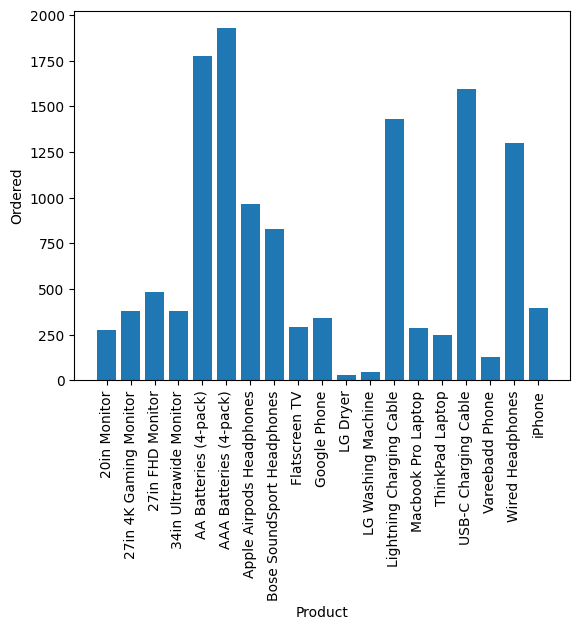

In [91]:
# Automatically select numeric columns to sum
product_group = all_data.groupby('Product')[all_data.select_dtypes('number').columns]

quantity_ordered=product_group.sum()['Quantity Ordered']
products=[product for product,df in product_group]
plt.bar(products,quantity_ordered)
plt.ylabel('Ordered')
plt.xlabel('Product')
plt.xticks(products,rotation='vertical',size=10)



C:\Users\adars\AppData\Local\Temp\ipykernel_23004\3222252639.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(products, rotation='vertical', size=8)


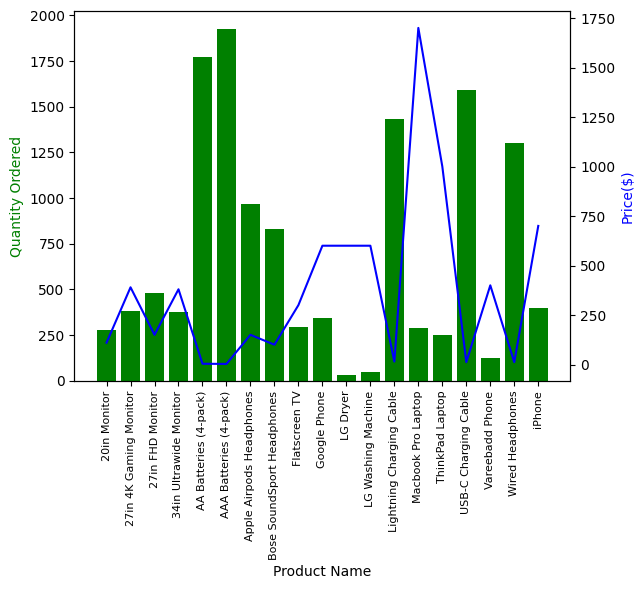

In [93]:
prices = all_data.groupby('Product')['Price Each'].mean()

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)
plt.show()